In [412]:
# -*- coding: utf-8 -*- 
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [413]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y = train['SalePrice']
# get all features except Id and SalePrice
feats = train.columns.difference(['Id','SalePrice'])
#For data exploration and feature engineering we will use concatenated data
df = pd.concat((train.loc[:,feats],
                      test.loc[:,feats]))
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [414]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


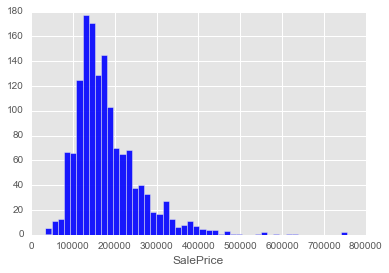

In [415]:
sns.distplot(y, kde = False, color = 'b', hist_kws={'alpha': 0.9})
print(y.describe())

In [416]:
#Before working with data we need to get rid of nan values

In [417]:
fArealist=['MasVnrArea','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath', 
           'BsmtHalfBath','MasVnrArea','Fireplaces','GarageArea','GarageYrBlt','GarageCars']
for i in fArealist:
    df[i] = df[i].fillna(0.0)
df = df.fillna(df.mean())
train = df.iloc[:1460,:]
test = df.iloc[1460:,:]

In [418]:
test

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010
5,763,892,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,763.0,AllPub,157,1993,1994,2010
6,1187,0,0,NaN,3,1Fam,TA,No,935.0,0.0,...,WD,0,Pave,6,1168.0,AllPub,483,1992,2007,2010
7,789,676,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,789.0,AllPub,0,1998,1998,2010
8,1341,0,0,NaN,2,1Fam,TA,Gd,637.0,0.0,...,WD,0,Pave,5,1300.0,AllPub,192,1990,1990,2010
9,882,0,0,NaN,2,1Fam,TA,No,804.0,78.0,...,WD,0,Pave,4,882.0,AllPub,240,1970,1970,2010


In [419]:
#separate numeric and categorial

In [420]:
num = df.select_dtypes(include = ['float64', 'int64'])
num_feat = num.columns
ctg = df.select_dtypes(include=['object'])
ctg_feat = ctg.columns

In [421]:
from scipy.stats import pearsonr
coef = []
for i in num_feat:
    coef.append(pearsonr(train[i], y)[0])

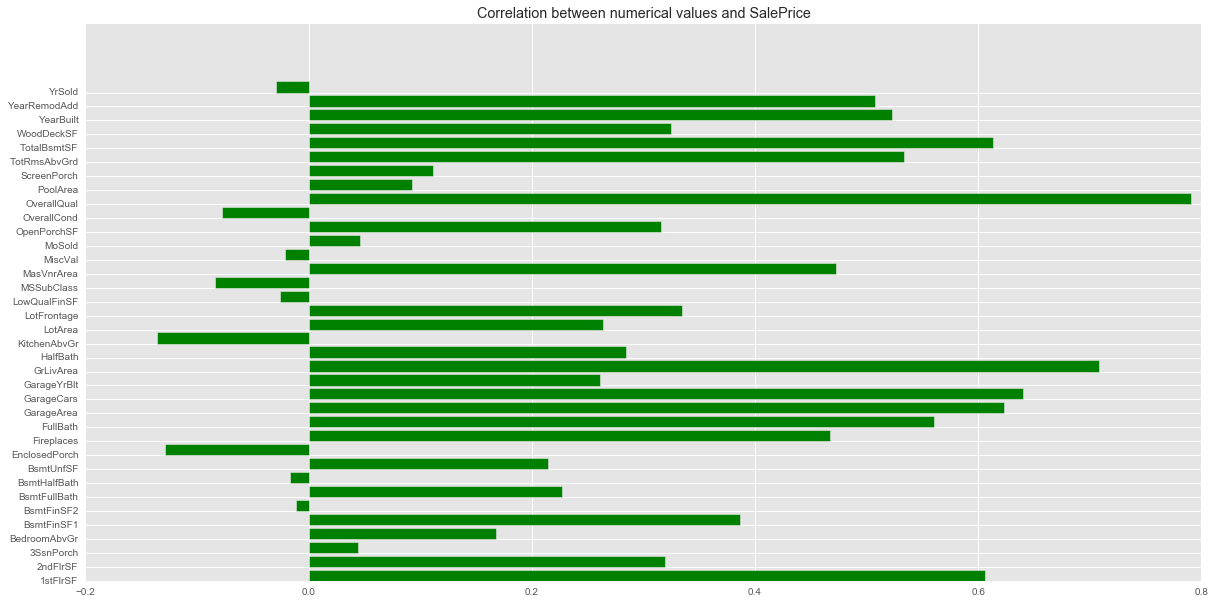

In [422]:
ypos = np.arange(len(coef))
plt.figure(figsize=(20,10))
plt.barh(ypos, coef, color = 'green')
plt.yticks(ypos, num_feat)
plt.title('Correlation between numerical values and SalePrice')

In [423]:
max(coef)

0.79098160058380507

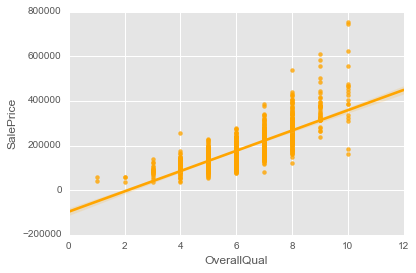

In [424]:
sns.regplot(x = train['OverallQual'], y = y, color = 'Orange')

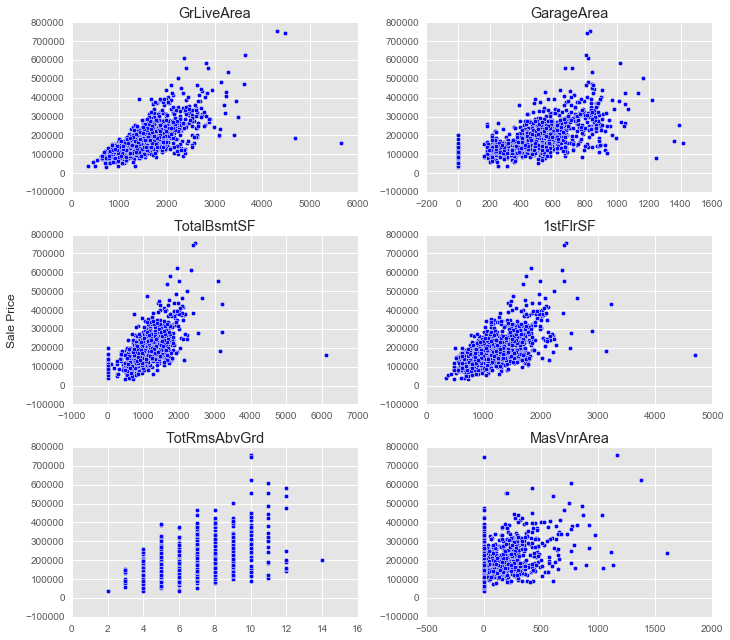

In [425]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = y
axarr[0, 0].scatter(train.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(train.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(train.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(train['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(train.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(train.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [426]:
for elem in coef:
    if abs(elem)<0.05:
        num = num.drop(num_feat[coef.index(elem)],1)
        print(num_feat[coef.index(elem)], elem)
num_feat = num.columns

3SsnPorch 0.0445836653357
BsmtFinSF2 -0.0113781214502
BsmtHalfBath -0.0168441542974
LowQualFinSF -0.0256061300007
MiscVal -0.0211895796403
MoSold 0.0464322452238
YrSold -0.0289225851687


In [427]:
num.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,...,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,856,854,3,706.0,1.0,150.0,0,0,2,548.0,...,61,5,7,0,0,8,856.0,0,2003,2003
1,1262,0,3,978.0,0.0,284.0,0,1,2,460.0,...,0,8,6,0,0,6,1262.0,298,1976,1976
2,920,866,3,486.0,1.0,434.0,0,1,2,608.0,...,42,5,7,0,0,6,920.0,0,2001,2002
3,961,756,3,216.0,1.0,540.0,272,1,1,642.0,...,35,5,7,0,0,7,756.0,0,1915,1970
4,1145,1053,4,655.0,1.0,490.0,0,1,2,836.0,...,84,5,8,0,0,9,1145.0,192,2000,2000


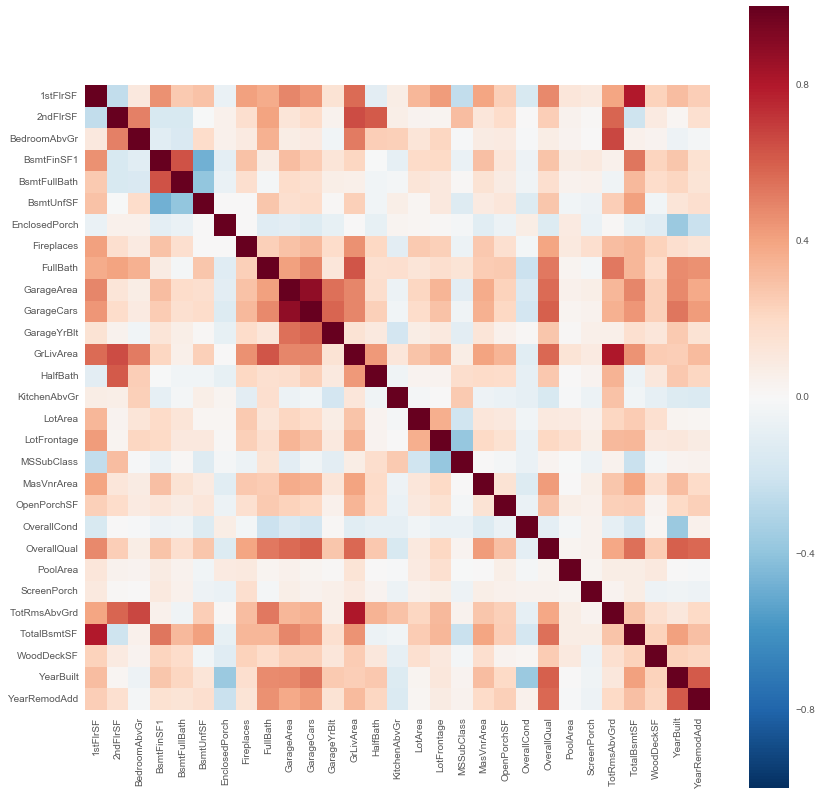

In [428]:
corr = num.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=1, square=True)

In [429]:
print(pearsonr(train['GarageArea'],y),pearsonr(train['GarageCars'],y) )
print(pearsonr(train['TotRmsAbvGrd'],y),pearsonr(train['GrLivArea'],y) )

(0.62343143891836161, 5.2650381679760199e-158) (0.64040919725835199, 2.4986441671778104e-169)
(0.5337231555820281, 2.7722809329570187e-108) (0.70862447761265202, 4.5180336467789258e-223)


In [430]:
num = num.drop('GarageArea',1)
num = num.drop('TotRmsAbvGrd',1)
num_feat = num.columns

In [431]:
num['1stFlr_2ndFlr_Sf'] = num['1stFlrSF'] + num['2ndFlrSF']
print(pearsonr(num['1stFlr_2ndFlr_Sf'].iloc[:1460],y))

(0.71688307936928097, 1.1839407871874376e-230)


In [432]:
num = num.drop(['1stFlrSF','2ndFlrSF'],1)

In [433]:
num.head()

,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GarageYrBlt,GrLivArea,...,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,1stFlr_2ndFlr_Sf
0,3,706.0,1.0,150.0,0,0,2,2.0,2003.0,1710,...,61,5,7,0,0,856.0,0,2003,2003,1710
1,3,978.0,0.0,284.0,0,1,2,2.0,1976.0,1262,...,0,8,6,0,0,1262.0,298,1976,1976,1262
2,3,486.0,1.0,434.0,0,1,2,2.0,2001.0,1786,...,42,5,7,0,0,920.0,0,2001,2002,1786
3,3,216.0,1.0,540.0,272,1,1,3.0,1998.0,1717,...,35,5,7,0,0,756.0,0,1915,1970,1717
4,4,655.0,1.0,490.0,0,1,2,3.0,2000.0,2198,...,84,5,8,0,0,1145.0,192,2000,2000,2198


In [434]:
num_feat = num.columns

# Let's work with non numeric attributes

In [435]:
ctg = ctg.fillna('Na')
ctg.describe().T

,count,unique,top,freq
Alley,2919,3,Na,2721
BldgType,2919,5,1Fam,2425
BsmtCond,2919,5,TA,2606
BsmtExposure,2919,5,No,1904
BsmtFinType1,2919,7,Unf,851
BsmtFinType2,2919,7,Unf,2493
BsmtQual,2919,5,TA,1283
CentralAir,2919,2,Y,2723
Condition1,2919,9,Norm,2511
Condition2,2919,8,Norm,2889


In [436]:
ctg = pd.get_dummies(ctg)
ctg_feat = ctg.columns
ctg.head()

,Alley_Grvl,Alley_Na,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,...,SaleType_ConLw,SaleType_Na,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Na,Utilities_NoSeWa
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


# Make dataset after changes

In [437]:
df = pd.concat([num, ctg], axis=1)
feat = df.columns

In [438]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(data = scaler.fit_transform(df), columns = feat)
train = df.iloc[:1460,:]
test = df.iloc[1460:,:]
target = y
y = scaler.fit_transform(y)

In [439]:
#We will use 2 technics: PCA and selection with a model

In [440]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train, y)

feature_imp = pd.DataFrame(model.feature_importances_, index = feat, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index

train_imp = train[feat_imp_20]

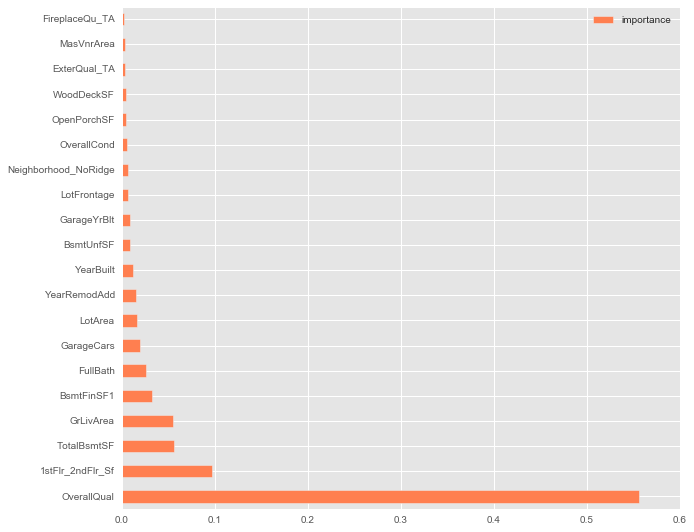

In [441]:
feature_imp.sort_values("importance", ascending=False).head(20).plot(kind = 'barh', figsize=(10, 9), color = 'coral')

In [442]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(train)
train_pca = pca.transform(train)

# Models

In [443]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [444]:
def plot_result(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, s=50)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.tight_layout()

In [445]:
#for further needs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [446]:
def test_regressor(reg, X_train, y_train):
    score = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error')
    print('RMSE =',(abs(score)**0.5).mean())

In [447]:
def rmse_on_depth(reg_class, alpha_values):
    error = []
    for alpha in alpha_values:
        reg = reg_class(max_depth=alpha)
        score =  cross_val_score(reg,train,y, scoring='neg_mean_squared_error')
        error.append((abs(score)**0.5).mean())
        
    plt.figure()
    plt.plot(alpha_values, error)
    plt.title('RMSE on max depth of the decision tree')
    plt.xlabel('Max depth')
    plt.ylabel('Error')

# Linear regressors

RMSE = 8.5831263788e+12


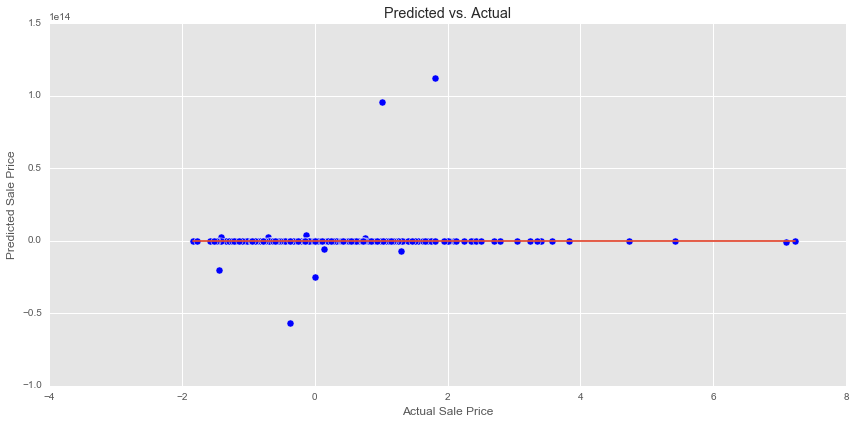

In [448]:
linreg = LinearRegression()
test_regressor(linreg, train, y)
plot_result(linreg)

In [449]:
test_regressor(linreg, train_pca, y)
test_regressor(linreg, train_imp, y)

RMSE = 0.471625394356
RMSE = 0.462306605495


In [450]:
lasso = Lasso(alpha = 0.3)
test_regressor(lasso, train, y)
test_regressor(lasso, train_imp, y)
test_regressor(lasso, train_pca, y)

RMSE = 0.619683797781
RMSE = 0.620988955545
RMSE = 0.55639184808


In [451]:
cv2 = LassoCV(alphas = np.logspace(-4,1,100,base = 10),n_jobs = -1)
test_regressor(cv2,train, y)
cv2.fit(train,y)
print(cv2.alpha_)

RMSE = 0.38812566924
0.0132194114847


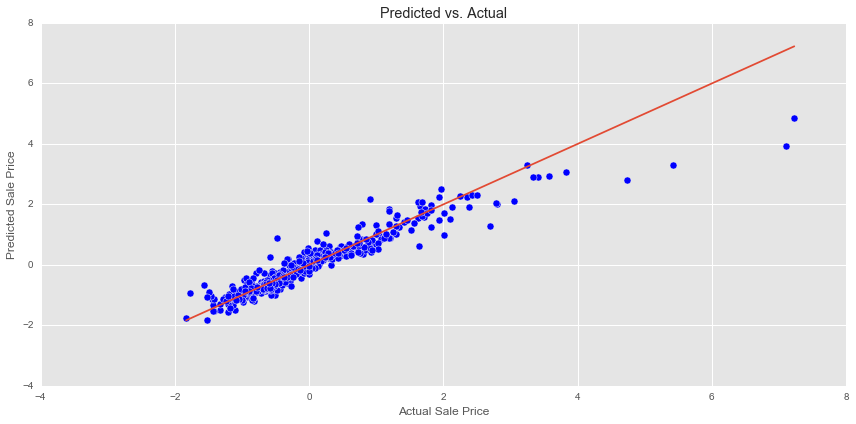

In [452]:
clf = Lasso(alpha = 0.0132194114847)
plot_result(clf)

In [453]:
ridge = Ridge()
test_regressor(ridge, train, y)
test_regressor(ridge, train_pca, y)
test_regressor(ridge, train_imp, y)

RMSE = 0.421816691455
RMSE = 0.471575943326
RMSE = 0.462103263768


In [454]:
from sklearn.linear_model import RidgeCV
cv = RidgeCV(alphas = np.logspace(-4,1,100,base = 10))
test_regressor(cv, train, y)
cv.fit(train,y)
print(cv.alpha_)

RMSE = 0.419803944771
1.38488637139


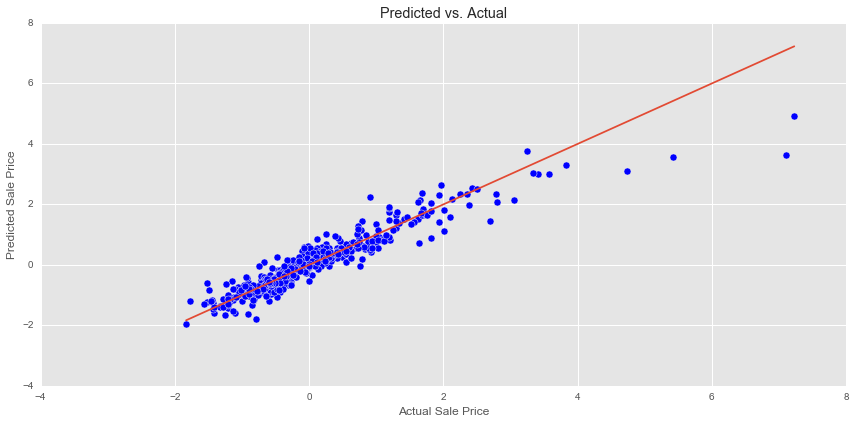

In [455]:
plot_result(Ridge(alpha = 1.38488637139))

# Other regressors

# Tree

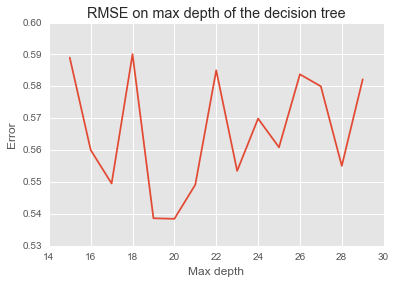

In [456]:
rmse_on_depth(DecisionTreeRegressor, np.arange(15, 30, 1))

In [457]:
tree = DecisionTreeRegressor(max_depth = 20)
test_regressor(tree, train, y)
test_regressor(tree, train_pca, y)
test_regressor(tree, train_imp, y)

RMSE = 0.587354669103
RMSE = 0.521131109519
RMSE = 0.517948087516


# Random forest

In [458]:
forest = RandomForestRegressor()
test_regressor(model, train, y)
test_regressor(forest, train_pca, y)
test_regressor(forest, train_imp, y)

RMSE = 0.413487420337
RMSE = 0.419229625952
RMSE = 0.381385949907


# Gradient boosting

RMSE = 0.332776093522


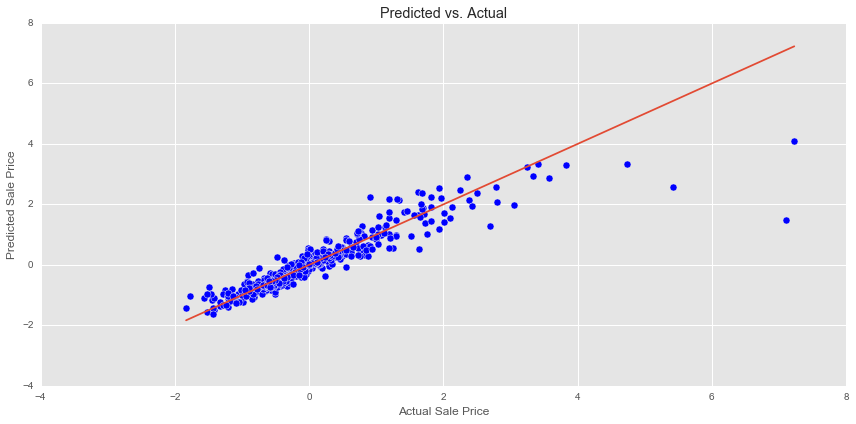

In [459]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=300)
test_regressor(gb_reg, train, y)
plot_result(gb_reg)

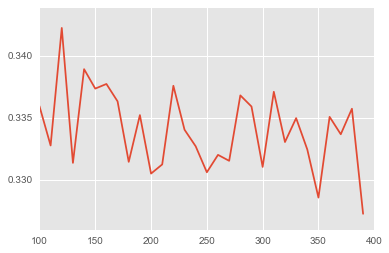

In [460]:
def rmse_on_estimators(reg_class, alpha_values):
    error = []
    for alpha in alpha_values:
        reg = reg_class(n_estimators=alpha)
        score =  cross_val_score(reg,train,y, scoring='neg_mean_squared_error')
        error.append((abs(score)**0.5).mean())
        
    plt.figure()
    plt.plot(alpha_values, error)
    
rmse_on_estimators(GradientBoostingRegressor, np.arange(100, 400, 10))